# Iris  
数据集文档中说了，后两个特征是主要特征，我们先通过可视化工具观察一下：

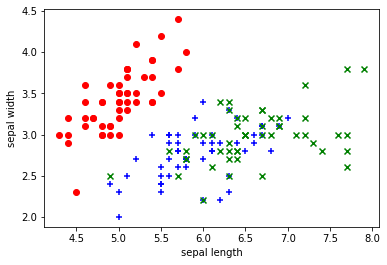

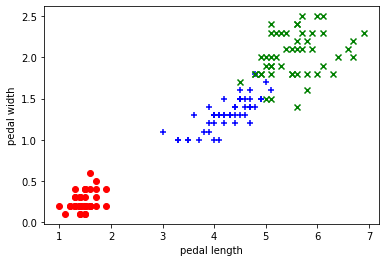

In [99]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

iris=datasets.load_iris()
x=iris.data[:,:2] # 取前两个特征
y=iris.target
plt.scatter(x[y==0,0],x[y==0,1],color='red',marker='o')   # 取特征第0,1列，绘制类别为0的，颜色red
plt.scatter(x[y==1,0],x[y==1,1],color='blue',marker='+')  # 取特征第0,1列，绘制类别为1的，颜色blue
plt.scatter(x[y==2,0],x[y==2,1],color='green',marker='x') # 取特征第0,1列，绘制类别为2的，颜色green
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

x=iris.data[:,2:] # 取后两个特征
y=iris.target
plt.scatter(x[y==0,0],x[y==0,1],color='red',marker='o') 
plt.scatter(x[y==1,0],x[y==1,1],color='blue',marker='+')  
plt.scatter(x[y==2,0],x[y==2,1],color='green',marker='x') 
plt.xlabel('pedal length')
plt.ylabel('pedal width')
plt.show()

果然，观察发现，通过最后两个特征就可以很好地将这三种花分开，前两个特征反而不好处理，会加重我们分类的负担。  
接下来使用Softmax对三种鸢尾花进行分类。

In [129]:
import torch
from sklearn.model_selection import train_test_split

class SoftmaxModel(torch.nn.Module):
    def __init__(self):
        super(SoftmaxModel,self).__init__()
        self.linear = torch.nn.Linear(2,3)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

model = SoftmaxModel()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.04)

x=torch.Tensor(iris.data[:,2:])
y=torch.LongTensor(iris.target)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

for epoch in range(10000):
    y_pred = model(x_train)
    loss = criterion(y_pred,y_train)
    if epoch%1000 == 0:
        print("epoch =",epoch,"\t loss = ",loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# test 
with torch.no_grad():
    y_pred = model(x_test)
    _,pred = torch.max(y_pred,dim=1)
    accuracy = sum(pred==y_test) / len(y_test)
    print("accuracy: ", accuracy.item())

epoch = 0 	 loss =  1.1099941730499268
epoch = 1000 	 loss =  0.43003547191619873
epoch = 2000 	 loss =  0.34501150250434875
epoch = 3000 	 loss =  0.3019830882549286
epoch = 4000 	 loss =  0.2737431824207306
epoch = 5000 	 loss =  0.2531404495239258
epoch = 6000 	 loss =  0.2372162640094757
epoch = 7000 	 loss =  0.22444388270378113
epoch = 8000 	 loss =  0.21392573416233063
epoch = 9000 	 loss =  0.20508815348148346
accuracy:  1.0


我能做到最好的准确率是100%。平均至少在98%以上。

# Adult  
数据预处理：将连续特征标准化，将离散特征变为 one-hot 向量。  
学习过程：使用逻辑回归和Adam梯度下降算法进行学习。

In [101]:
x1 = []
x2 = []
y = []
x1_indexs = [0,2,4,10,11,12]
x2_indexs = [1,3,5,6,7,8,9,13]
with open("../input/ucl-adult/adult.data","r") as f:
    for line in f:
        line = line.replace('\n','')
        line = line.replace(' ','')
        #line = line.replace("Married-AF-spouse","Married")
        #line = line.replace("Married-civ-spouse","Married")
        #line = line.replace("Married-spouse-absent","Married")
        #line = line.replace("Widowed","Not-Married")
        #line = line.replace("Divorced","Not-Married")
        #line = line.replace("Separated","Not-Married")
        #line = line.replace("Without-pay","Unemployed")
        #line = line.replace("Never-worked","Unemployed")
        #line = line.replace("Local-gov","gov")
        #line = line.replace("State-gov","gov")
        #line = line.replace("Self-emp-inc","Self-employed")
        #line = line.replace("Self-emp-not-inc","Self-employed")
        #line = line.replace("?","Not Know")
        #for country in ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                   #"Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                   #"Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                   #"United-States"]:
            #line = line.replace(country,"North America")
        #for country in ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
          #"Philippines", "Taiwan", "Thailand", "Vietnam"]:
            #line = line.replace(country,"Asia")
       # for country in ["England", "France", "Germany", "Greece", "Holand-Netherlands",
           # "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
           # "Yugoslavia"]:
            #line = line.replace(country,"Europe")
        #for country in ["Columbia", "Ecuador", "Peru"]:
            #line = line.replace(country,"South America")
        x = line.split(',')
        if len(x) != 15:
            continue
        if x[-1] == ">50K":
            y.append(1)
        elif x[-1] == "<=50K":
            y.append(0)
        x1.append([x[i] for i in x1_indexs])
        x2.append([x[i] for i in x2_indexs])
    


# Normalization
x1 = np.array(x1,dtype="float")
x1 -= np.mean(x1,axis=0)
x1 /= np.std(x1,axis=0)

# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
x2 = encoder.fit_transform(x2)
x2 = np.array(x2,dtype="int")

x = np.concatenate((x1,x2),axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


现在我们得到了适于学习的数据。

In [102]:
class LogisticModel(torch.nn.Module):
    def __init__(self):
        super(LogisticModel,self).__init__()
    #   if you want to test the efficacy of 'manual PCA', use the line below
    #   self.linear = torch.nn.Linear(65,1)
        self.linear = torch.nn.Linear(108,1)
        
        
        
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model=LogisticModel()

criterion = torch.nn.BCELoss(reduction = 'sum') 
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
# training
x = torch.Tensor(x_train)
y = torch.Tensor(y_train).view(-1,1)
           
for epoch in range(1000):
    y_pred = model(x)
    loss=criterion(y_pred,y) + torch.norm(model.linear.weight).item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    
    if  epoch%100==0:
        pred = [a>0.5 for a in y_pred]
        pred = np.array(pred,dtype = 'int')
        accuracy = sum(pred==y_train) / len(y_train)
        print("epoch =",epoch,"\t loss = ",loss.item(),"\t train_accuracy = ",accuracy)

# test
x = torch.Tensor(x_test)
with torch.no_grad():
    y_pred = model(x)
    pred = [a>0.5 for a in y_pred]

pred = np.array(pred,dtype = 'int')          
accuracy = sum(pred==y_test) / len(y_test)
print("test_accuracy: ", accuracy)

epoch = 0 	 loss =  15820.080078125 	 train_accuracy =  0.54505967005967
epoch = 100 	 loss =  7693.03173828125 	 train_accuracy =  0.8418743418743418
epoch = 200 	 loss =  7428.693359375 	 train_accuracy =  0.8482800982800983
epoch = 300 	 loss =  7320.4052734375 	 train_accuracy =  0.8514391014391014
epoch = 400 	 loss =  7269.55712890625 	 train_accuracy =  0.8526237276237276
epoch = 500 	 loss =  7245.02294921875 	 train_accuracy =  0.8528431028431028
epoch = 600 	 loss =  7232.8349609375 	 train_accuracy =  0.8531063531063531
epoch = 700 	 loss =  7226.61865234375 	 train_accuracy =  0.8535012285012284
epoch = 800 	 loss =  7223.341796875 	 train_accuracy =  0.8538522288522289
epoch = 900 	 loss =  7221.50830078125 	 train_accuracy =  0.8538961038961039
test_accuracy:  0.8543351417750026


本来想在不改变模型结构的情况下再优化一下模型，但是打印出来发现测试集和训练集的正确率相差其实不大，所以最终正确率上不去应该主要是模型太过简单的问题。查阅了一下数据集提供的文档，用很多简单的分类方法使用默认参数的正确率也大概在80%-85%上下，所以说也不必追求过高的准确率。  

最后经过数据降维（事实上没有用，所以注释掉了），多次调整参数之后再加上范数惩罚，我最好能做到的是85%的正确率。

# Wine  
数据预处理：
将数据读入并且标准化。   
（原本打算使用一定的PCA手段进行降维，但是最后发现差别不大，为了保留有数据的可解释性，故不使用。）   
这里还是选用Softmax进行多分类。

In [130]:
x = []
y = []
with open("../input/ucl-wine/wine.data", "r") as f:
    for line in f:
        line = line.replace('\n','')
        x_ = line.split(',')
        y.append(int(x_[0])-1)
        x.append([float(a) for a in x_[1:]])

# Normalization 
x = np.array(x, dtype="float")
x -= np.mean(x,axis=0)
x /= np.std(x,axis=0)

x = torch.Tensor(x)
y = torch.LongTensor(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

现在我们得到了适于学习的数据。

In [131]:

class SoftmaxModel(torch.nn.Module):
    def __init__(self):
        super(SoftmaxModel,self).__init__()
        self.linear = torch.nn.Linear(13,3)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

model = SoftmaxModel()

criterion = torch.nn.CrossEntropyLoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(),lr = 0.05)



for epoch in range(10000):
    y_pred = model(x_train)
    loss = criterion(y_pred,y_train)
    if epoch%1000 == 0:
        print("epoch =",epoch,"\t loss = ",loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# test 
with torch.no_grad():
    y_pred = model(x_test)
    _,pred = torch.max(y_pred,dim=1)
    accuracy = sum(pred==y_test) / len(y_test)
    print("accuracy: ", accuracy.item())
    

epoch = 0 	 loss =  119.0016098022461
epoch = 1000 	 loss =  0.055518172681331635
epoch = 2000 	 loss =  0.029676135629415512
epoch = 3000 	 loss =  0.02032804675400257
epoch = 4000 	 loss =  0.015480260364711285
epoch = 5000 	 loss =  0.012508394196629524
epoch = 6000 	 loss =  0.010499131865799427
epoch = 7000 	 loss =  0.009048503823578358
epoch = 8000 	 loss =  0.007951430045068264
epoch = 9000 	 loss =  0.007092313375324011
accuracy:  1.0


我能做到最好的正确率是100%。平均来说正确率在96%以上。